## The overall goal of this assignment is to explore the National Emissions Inventory database and see what it say about fine particulate matter pollution in the United states over the 10-year period 1999–2008.

In [80]:
library(dplyr)
library(ggplot2)

In [2]:
pm_df <- readRDS('PM2.5_Emmission_Data/summarySCC_PM25.rds')
head(pm_df)

,fips,SCC,Pollutant,Emissions,type,year
4,09001,10100401,PM25-PRI,15.714,POINT,1999
8,09001,10100404,PM25-PRI,234.178,POINT,1999
12,09001,10100501,PM25-PRI,0.128,POINT,1999
16,09001,10200401,PM25-PRI,2.036,POINT,1999
20,09001,10200504,PM25-PRI,0.388,POINT,1999
24,09001,10200602,PM25-PRI,1.490,POINT,1999


In [82]:
sc_name <- readRDS("PM2.5_Emmission_Data/Source_Classification_Code.rds")
sc_name


SCC,Data.Category,Short.Name,EI.Sector,Option.Group,Option.Set,SCC.Level.One,SCC.Level.Two,SCC.Level.Three,SCC.Level.Four,Map.To,Last.Inventory.Year,Created_Date,Revised_Date,Usage.Notes
10100101,Point,Ext Comb /Electric Gen /Anthracite Coal /Pulverized Coal,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Pulverized Coal,NA,NA,,,
10100102,Point,Ext Comb /Electric Gen /Anthracite Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Anthracite Coal,Traveling Grate (Overfeed) Stoker,NA,NA,,,
10100201,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Wet Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Wet Bottom (Bituminous Coal),NA,NA,,,
10100202,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Bituminous Coal),NA,NA,,,
10100203,Point,Ext Comb /Electric Gen /Bituminous Coal /Cyclone Furnace,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cyclone Furnace (Bituminous Coal),NA,NA,,,
10100204,Point,Ext Comb /Electric Gen /Bituminous Coal /Spreader Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Spreader Stoker (Bituminous Coal),NA,NA,,,
10100205,Point,Ext Comb /Electric Gen /Bituminous Coal /Traveling Grate (Overfeed) Stoker,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Traveling Grate (Overfeed) Stoker (Bituminous Coal),NA,NA,,,
10100211,Point,Ext Comb /Electric Gen /Bituminous Coal /Wet Bottom (Tangential),Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Wet Bottom (Tangential) (Bituminous Coal),NA,NA,,,
10100212,Point,Ext Comb /Electric Gen /Bituminous Coal /Pulverized Coal: Dry Bottom (Tangential),Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Pulverized Coal: Dry Bottom (Tangential) (Bituminous Coal),NA,NA,,,
10100215,Point,Ext Comb /Electric Gen /Bituminous Coal /Cell Burner,Fuel Comb - Electric Generation - Coal,,,External Combustion Boilers,Electric Generation,Bituminous/Subbituminous Coal,Cell Burner (Bituminous Coal),NA,NA,,,


## Have total emissions from PM2.5 decreased in the United States from 1999 to 2008?

Warning message:
“Removed 60 rows containing non-finite values (stat_boxplot).”

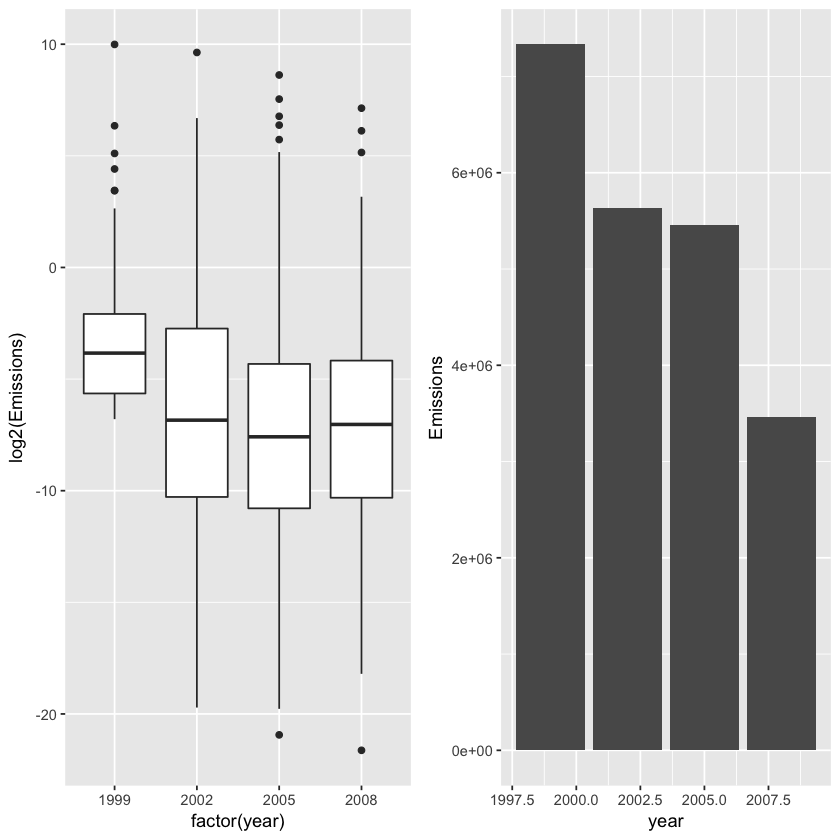

In [79]:
#png("Stat_Emission_by_years.png", width=480, height=480)
idx <- sample(nrow(pm_df), 1000 )
p_g <- qplot(factor(year), log2(Emissions), data = pm_df[idx, ], geom = "boxplot")
Emission_sum <- aggregate(Emissions ~ year, pm_df, sum)
# head(Emission_sum)
p <- ggplot(data = Emission_sum, aes(x= year, y = Emissions)) +
    geom_bar(stat = "identity")
grid.arrange(p_g, p, nrow=1)

#dev.off()

Answer: 

- from the general botplot plotting, we can see that in Median, the the emmisoon was decreased every year, however, the variation in each year from 2000 to 2008 has not changed too much,

- In total, there is decreasing trend for amount of emission every year from 1999 to 2008

---------------------

##  Have total emissions from PM2.5 decreased in the Baltimore City, Maryland ( fips == "24510" ) from 1999 to 2008? 

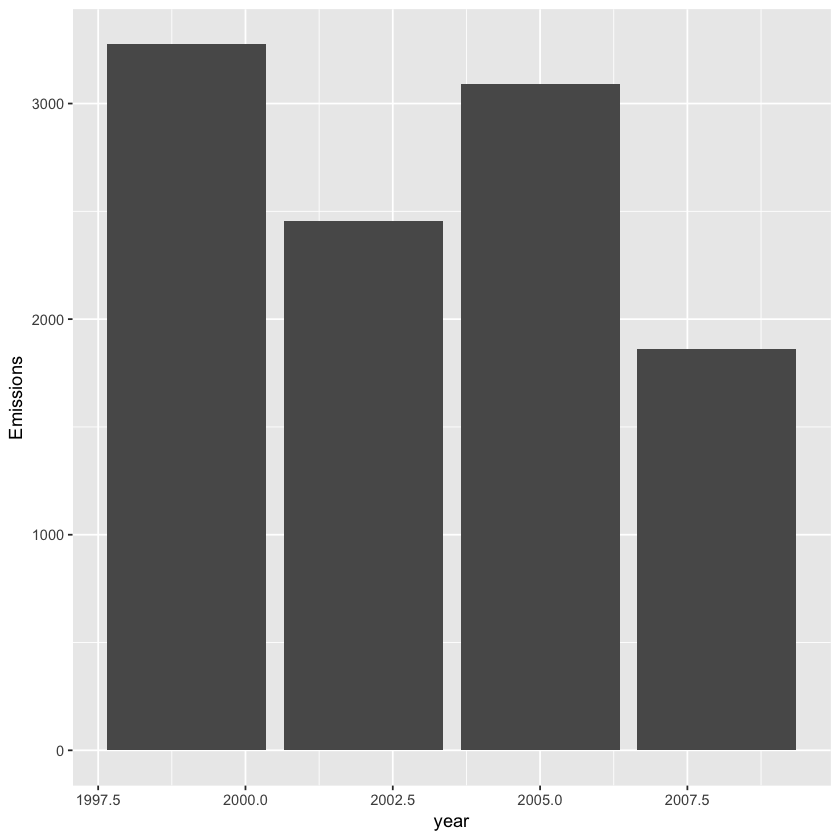

In [7]:
# png("Total_Emission_by_years_Baltimore_MA.png", width=480, height=480)
pm_Balti <- filter(pm_df, fips == "24510" )
# head(pm_Balti)
pm_Bal_Emi <- aggregate( Emissions ~ year, pm_Balti, sum)
# head(pm_Bal_Emi)
ggplot(data = pm_Bal_Emi, aes(x = year, y = Emissions)) + geom_bar(stat = "identity")
      
      
# dev.off()

Answer:

In general the total emission was decreased but from 2003 to 2006, there were a short-term trend to in increase

-------------------

## Of the four types of sources indicated by the (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008? 

In [73]:
pm_Balti <- filter(pm_df, fips == "24510" )
# head(pm_Balti)
pm_Balti_type <- group_by(pm_Balti, type, year) %>% summarize(total_emission = sum(Emissions, na.rm = TRUE))
df1 <- filter(pm_Balti_type, type == "NON-ROAD") 
df2 <- filter(pm_Balti_type, type == "NONPOINT") 
df3 <- filter(pm_Balti_type, type == "POINT")
df4 <- filter(pm_Balti_type, type == "ON-ROAD")


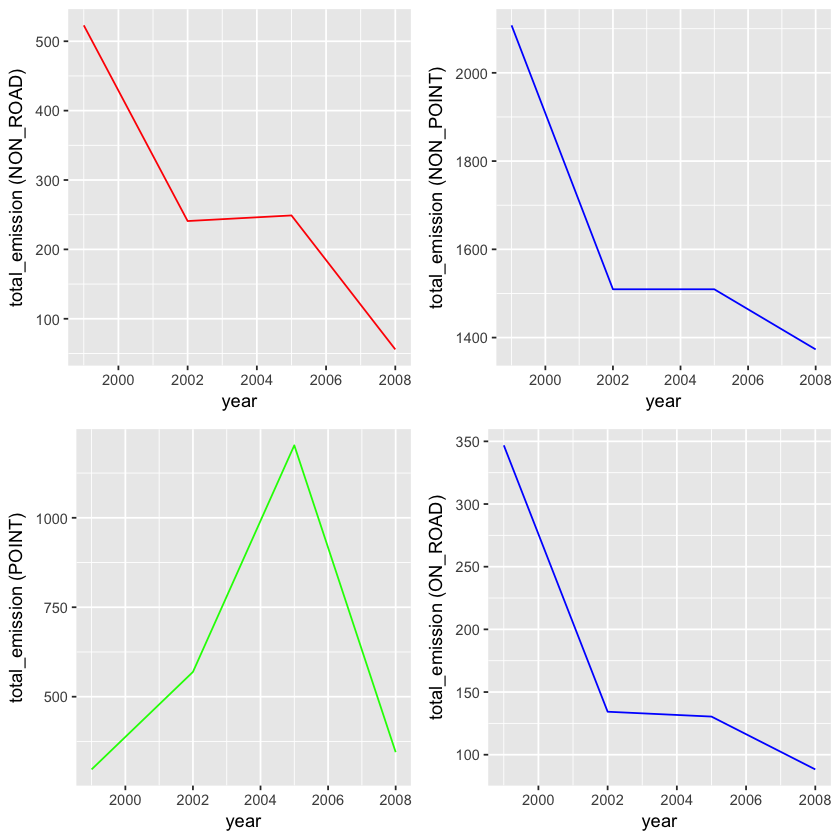

In [89]:
#png("Total_Emission_by_years_type.png", width=480, height=480)
p1 <- ggplot( data = df1, aes(year, total_emission)) +
     geom_line(color = "red") + ylab("total_emission (NON_ROAD)")
    
p2 <- ggplot( data = df2, aes(year, total_emission)) +
     geom_line(color = "blue") + ylab("total_emission (NON_POINT)")
p3 <- ggplot( data = df3, aes(year, total_emission)) +
     geom_line(color = "green") + ylab("total_emission (POINT)")

p4 <- ggplot( data = df4, aes(year, total_emission)) +
     geom_line(color = "blue") + ylab("total_emission (ON_ROAD)")
grid.arrange(
  grobs = list(p1,p2,p3, p4)
)
#dev.off()

Answer: 

* NON-ROAD : decreasing in trend but stay stable after 2003
* NONPOINT : decreasing in trend but stay stable after 2003
* POINT : increase from 2003 to 2006 and decrease aagain from 2006 t0 2008
* ON-ROAD : decreasing dramatically fron 1999 to 2004


----------------

## Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?

In [99]:
coal_combust <- c("Fuel Comb - Comm/Institutional - Coal",
  "Fuel Comb - Electric Generation - Coal",
  "Fuel Comb - Industrial Boilers, ICEs - Coal")
f_sc_SCC <- filter(sc_name, EI.Sector %in% coal_combust) %>% select (SCC)
coal_combu_pm_df <- filter(pm_df, SCC %in% f_sc_SCC$SCC) 
coal_combu_pm_df_mean <- aggregate(Emissions ~ year, coal_combu_pm_df, mean)
head(coal_combu_pm_df)
head(coal_combu_pm_df_mean)

fips,SCC,Pollutant,Emissions,type,year
09011,10100217,PM25-PRI,479.907,POINT,1999
23001,2102001000,PM25-PRI,0.054,NONPOINT,1999
23001,2103002000,PM25-PRI,0.231,NONPOINT,1999
23003,2102001000,PM25-PRI,0.032,NONPOINT,1999
23003,2103002000,PM25-PRI,0.194,NONPOINT,1999
23005,10200202,PM25-PRI,0.119,POINT,1999


year,Emissions
1999,102.71571
2002,62.97238
2005,63.94650
2008,61.53597


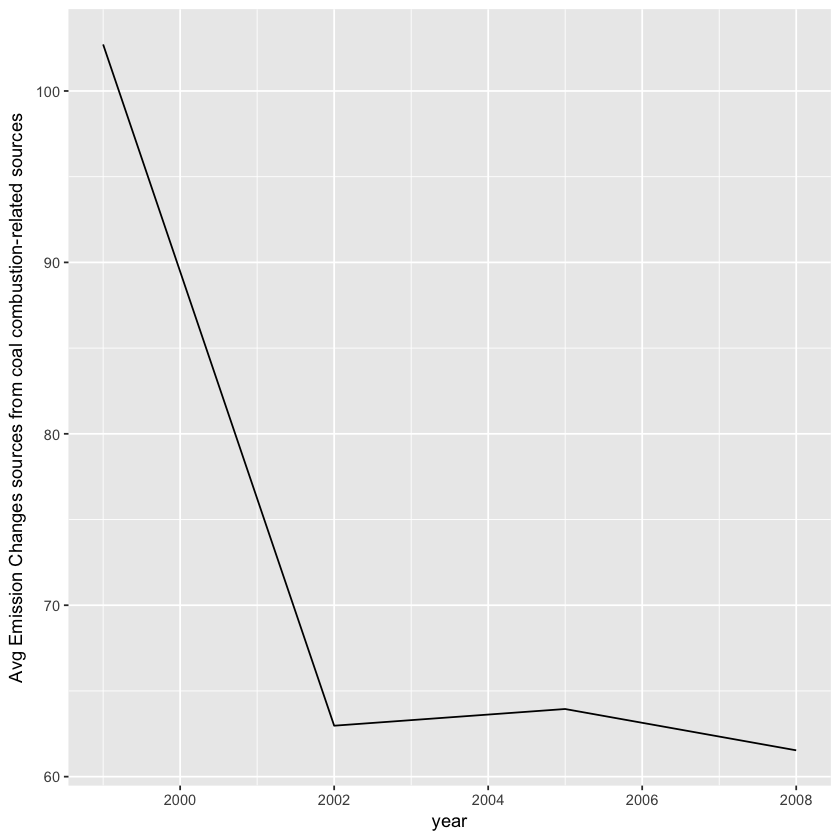

In [103]:
#png("Avg Emission Changes sources from coal combustion-related sources.png", width=480, height=480)
ggplot(data = coal_combu_pm_df_mean, aes(x = year, y = Emissions)) +
      geom_line() +
      ylab("Avg Emission Changes sources from coal combustion-related sources")
#dev.off()

Answer: sources of emissions from coal combustion-related sources decreased dramatically over the years

---------

## How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City?

In [105]:
pm_Balti <- filter(pm_df, fips == "24510" & type=="ON-ROAD")
vehi_pm_df_mean <- aggregate(Emissions ~ year, pm_Balti, mean)
head(vehi_pm_df_mean)

year,Emissions
1999,1.8063542
2002,0.4184075
2005,0.4025629
2008,0.3130335


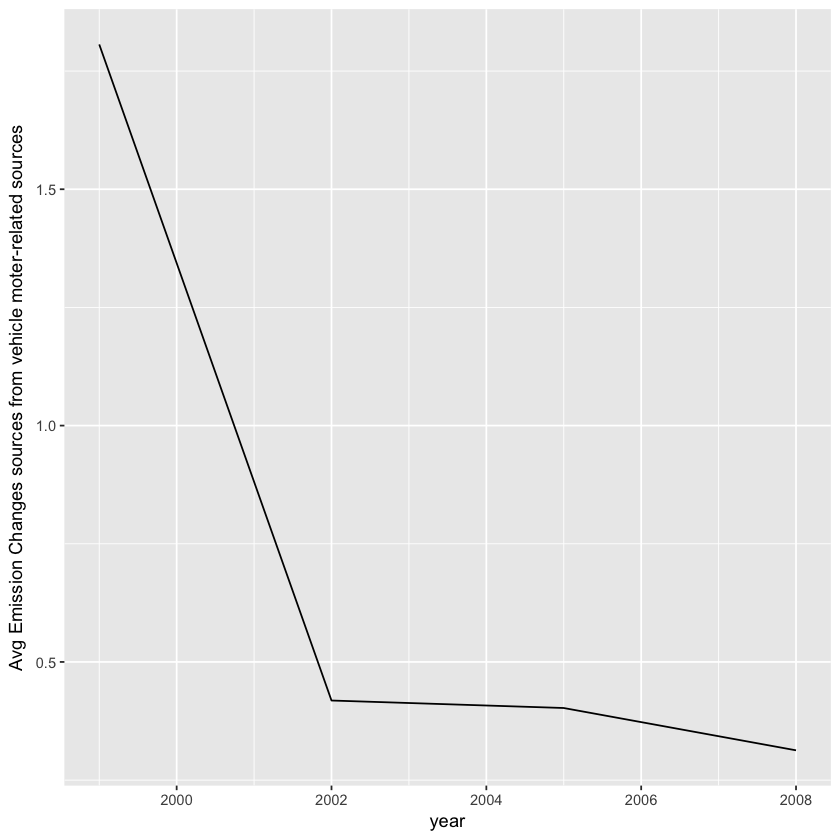

In [108]:
#png("Avg Emission Changes sources from motor vehicle sources.png", width=480, height=480)
ggplot(data = vehi_pm_df_mean, aes(x = year, y = Emissions)) +
      geom_line() +
      ylab("Avg Emission Changes sources from vehicle moter-related sources")
#dev.off()

Answer: sources of emissions from coal motor vehicle sources decreased dramatically over the years

------------------------

## Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == "06037" ). Which city has seen greater changes over time in motor vehicle emissions?

In [129]:
city <- c("06037","24510" )
balti_pm_df_moter <- filter(pm_df, fips== "24510" & type == "ON-ROAD")
la_pm_df_moter <- filter(pm_df, fips== "06037" & type == "ON-ROAD")

# head(balti_pm_df_moter)
# head(la_pm_df_moter)

combo_la_bal_moter <- rbind(balti_pm_df_moter, la_pm_df_moter)
## aftr comhine two data frame, we set each row with marks of baltimore and LA
combo_la_bal_moter_df <- mutate(combo_la_bal_moter, city = factor(rep(c("Baltimore (24510)","LA (06037)" ), c(nrow(balti_pm_df_moter), nrow(la_pm_df_moter))))) 
                       
head(combo_la_bal_moter_df)
pm_df_final <- group_by(combo_la_bal_moter_df, city, year) %>% summarize(Emission_mean = mean(Emissions, na.rm = TRUE))
head(pm_df_final)

fips,SCC,Pollutant,Emissions,type,year,city
24510,220100123B,PM25-PRI,7.38,ON-ROAD,1999,Baltimore (24510)
24510,220100123T,PM25-PRI,2.78,ON-ROAD,1999,Baltimore (24510)
24510,220100123X,PM25-PRI,11.76,ON-ROAD,1999,Baltimore (24510)
24510,220100125B,PM25-PRI,3.50,ON-ROAD,1999,Baltimore (24510)
24510,220100125T,PM25-PRI,1.32,ON-ROAD,1999,Baltimore (24510)
24510,220100125X,PM25-PRI,5.58,ON-ROAD,1999,Baltimore (24510)


city,year,Emission_mean
Baltimore (24510),1999,1.8063542
Baltimore (24510),2002,0.4184075
Baltimore (24510),2005,0.4025629
Baltimore (24510),2008,0.3130335
LA (06037),1999,27.2994444
LA (06037),2002,10.7921975


`geom_smooth()` using method = 'loess'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 1999”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 6.045”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 36.542”Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data values than degrees of freedom.”Warning message in predLoess(object$y, object$x, newx = if (is.null(newd

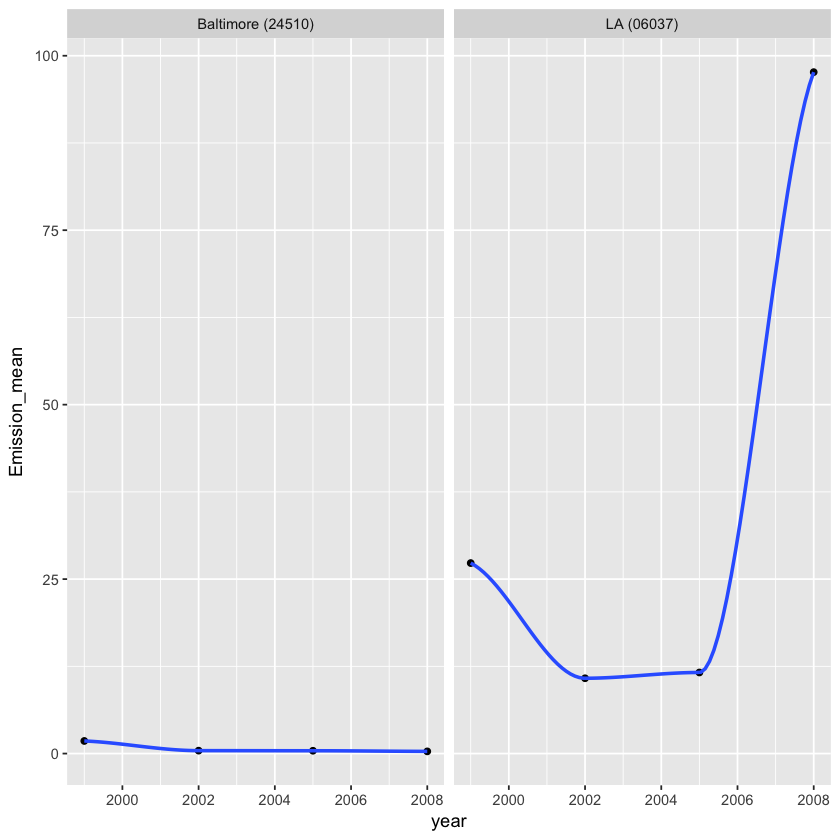

In [132]:
#png("Avg Emission Changes between LA and Baltomore sourcing from motor vehicle.png", width=480, height=480)
qplot(year, Emission_mean , data = pm_df_final, facets = . ~ city)+geom_smooth()
#dev.off()

Answer: Baltimore emission dramatically increaded from 2005 to 2008, while LA stayed low over the years